# imports

In [1]:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr,fisher_exact
from skbio.diversity.alpha import shannon, simpson, berger_parker_d

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *
import math
from myplots import roundup, rounddown, find_decimal_fold
from skbio.stats.distance import mantel
from scipy.spatial.distance import braycurtis, pdist, euclidean


from GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions2 import *
from SampleLists.SampleFileFunctions import *
from PhenotypicData.PhenotypeGenerationFunctions import *
from CardioProject.CardioFunctions import *
from PredictionPipeline.PredictionFunctions import *
from TCR_feature_generation.SubsamplingFunctions import *

import os
from Utils import cacheOnDisk
from SegalQueue.qp import qp,fakeqp
from addloglevels import sethandlers

#ML imports:
from xgboost import XGBClassifier
import lightgbm as lgb
from collections import OrderedDict
from sklearn.model_selection import GroupKFold,StratifiedKFold, KFold
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression
import shap
from sklearn import metrics, preprocessing
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel,SelectKBest,chi2,mutual_info_classif,f_classif
from sklearn.naive_bayes import GaussianNB

MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

done1
stop
stop
done1
stop
done
done
done
done
stop
stop
end of function!!!


/usr/wisdom/python/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


end of function!!!


In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate

'16092018'

# analyse cardio phenotype file and save: *updated 150918

In [ ]:
f2='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenAllInfo_withDummies.xlsx' %MyPath
origData=pd.read_excel(f2)

df=pd.DataFrame()
for n,col in enumerate(origData.columns):
    nans=len(origData[origData[col].isnull()])
    n9999=len(origData[origData[col]==9999])
    nCategs=len(origData[col].value_counts())
#     print col,nans,n9999,nCategs
    df.loc[n,'number of Nans']=nans
    df.loc[n,'number of 9999s']=n9999
    df.loc[n,'number of categories']=nCategs
    df.loc[n,'columns']=col
df['total nans']=df['number of Nans']+df['number of 9999s']
df['Type']=df['number of categories'].apply(lambda x: 'constant' if x<2 else ('binary' if x==2 else ('categorial' if (x>2)&\
(x<6) else 'Continuous')))

f3='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenAllInfo_withDummies_ANALYSIS.xlsx' %MyPath
df.to_excel(f3)

    


In [ ]:
#INTERESTING COLUMNS (BINARY/CONTINUOUS, WITH MAXIMUM 34 MISSING VALUES)
binaryPhens=['Hypertension','Dyslipidemia','Microvascular Complications']
continuousPhens=['LDL','HDL','Triglycerides','CRP','HbA1C','PLT','Hemoglobin',
'Initial CPK','Maximal CPK','LDH','AST','Glucose']

# check phenotype association with TCRdf:

## full dataset

************comparing TCRfeatures between cohorts (not matched!):*************
generating excel file with mean values for compared dataset (find in -featureSummaryDFs folder-)
comparing datasets and plot selected features:...


/usr/wisdom/python/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/wisdom/python/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/wisdom/python/lib/python2.7/site-packages/statsmodels/stats/multitest.py:320: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha


plot file can be found in -realAnalysis folder


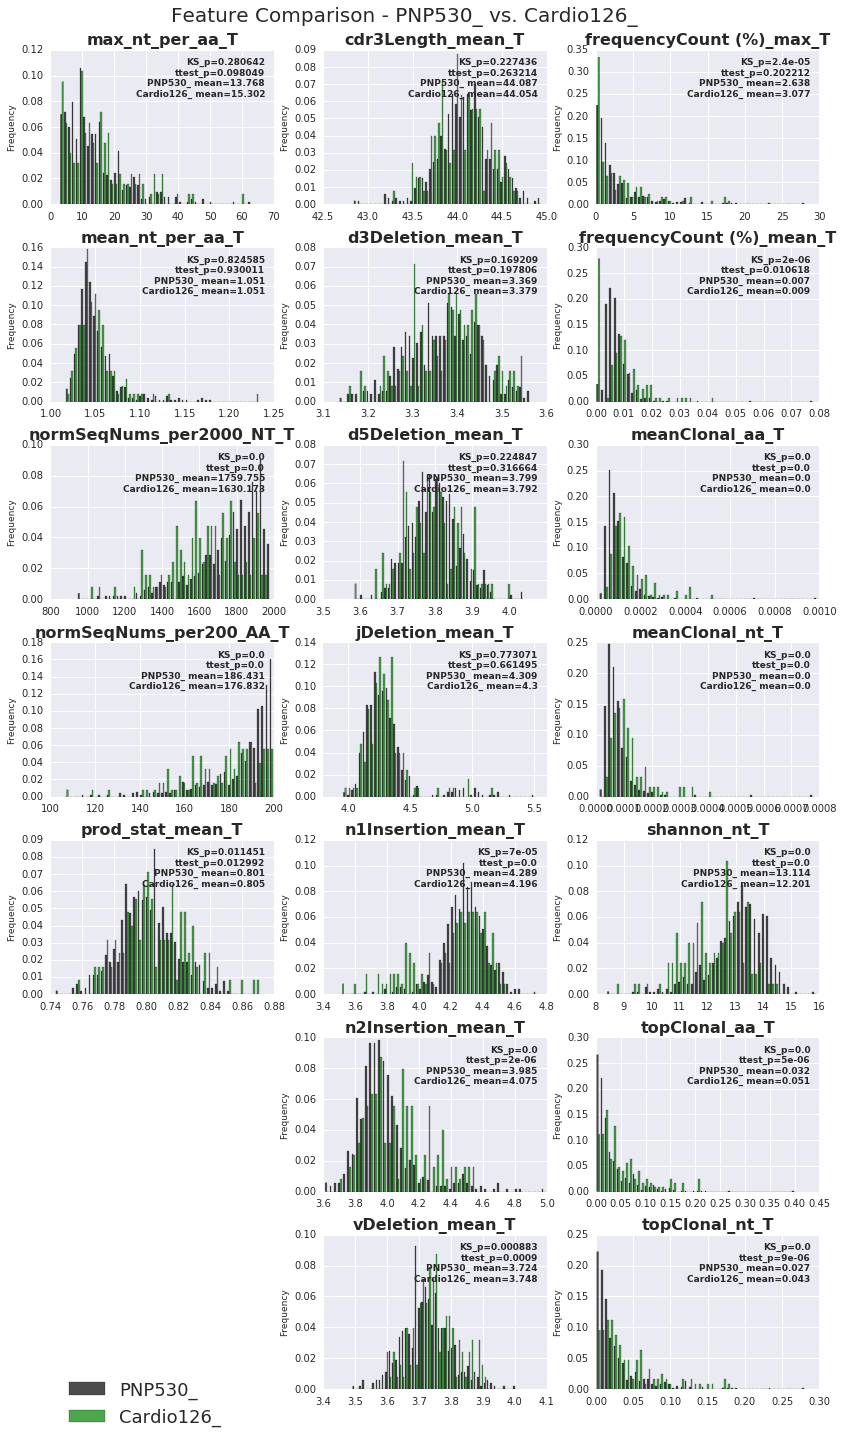

generating excel file with mean values for compared dataset (find in -featureSummaryDFs folder-)
plotting gene usage comparison...
plot file can be found in -realAnalysis folder


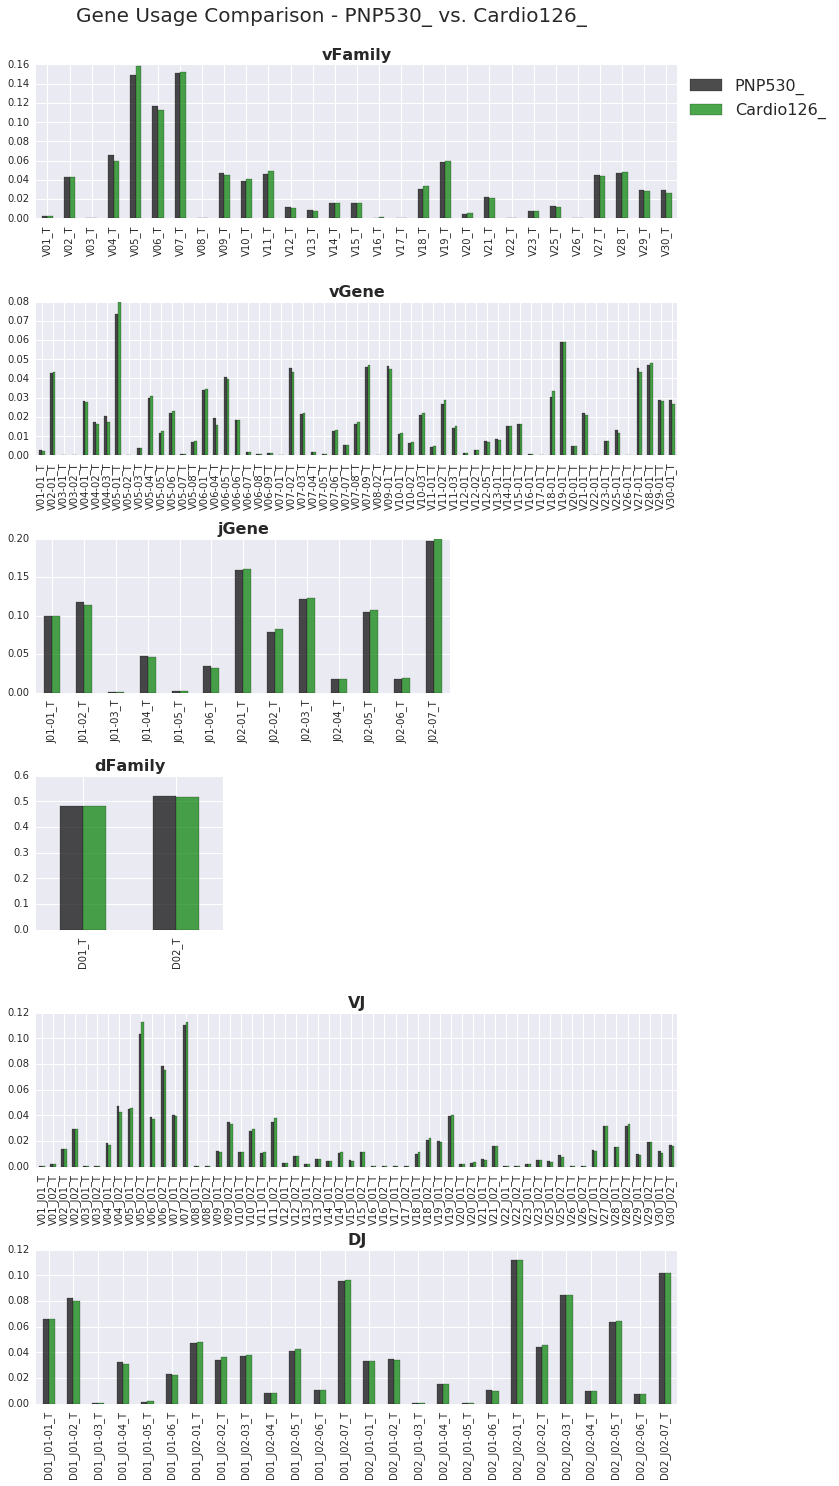

generating distmats for PNP
generating distMat for phenotype Age
generating condensed distance matrix using euclidean
top similar pairs:
        dist sample1 sample2
225746   0.0   BD350   BD383
352586   0.0   BD556   BD756
92984    0.0   BD192   BD727
134174   0.0   BD237   BD920
307720   0.0   BD473   BD659
92989    0.0   BD192   BD731
158914   0.0   BD266   BD766
92994    0.0   BD192   BD736
282224   0.0   BD431    BD71
201386   0.0   BD318   BD701
generating squareform distance matrix using euclidean
generating distMat for phenotype BMI
generating condensed distance matrix using euclidean
top similar pairs:
        dist sample1 sample2
271058   0.0   BD414   BD715
152555   0.0   BD259   BD561
93842    0.0   BD193    BD74
167487   0.0   BD277   BD310
446217   0.0   BD877   BD919
323674   0.0   BD500   BD593
209149   0.0   BD328   BD769
61091    0.0   BD159   BD761
152884   0.0   BD259   BD858
380319   0.0   BD617   BD838
generating squareform distance matrix using euclidean
generati

                                         featureName            phenotype  \
0  TCRdfpercShared10OLtrimmed_binary_jaccard_distMat          Gender_Male   
0      TCRdfpercShared10OLtrimmed_braycurtis_distMat          Gender_Male   
0      TCRdfpercShared10OLtrimmed_braycurtis_distMat  Smoking Status_Past   
0      TCRdfpercShared10OLtrimmed_braycurtis_distMat         Smoking_Past   
0      TCRdfpercShared10OLtrimmed_braycurtis_distMat          Gender_Male   
0  TCRdfpercShared10OLtrimmed_binary_jaccard_distMat          Gender_Male   
0      TCRdfpercShared10OLtrimmed_braycurtis_distMat         Smoking_Past   
0      TCRdfpercShared10OLtrimmed_braycurtis_distMat  Smoking Status_Past   
0  TCRdfpercShared10OLtrimmed_binary_jaccard_distMat         Smoking_Past   
0  TCRdfpercShared10OLtrimmed_binary_jaccard_distMat  Smoking Status_Past   
0      TCRdfpercShared10OLtrimmed_braycurtis_distMat   Smoking Status_Yes   
0      TCRdfpercShared10OLtrimmed_braycurtis_distMat          Smoking_Yes   

generating distMat for phenotype LDL
generating condensed distance matrix using euclidean
top similar pairs:
      dist sample1 sample2
2020   0.0   BD969  BD1005
4787   0.0  BD1002  BD1093
3539   0.0   BD986  BD1029
3535   0.0   BD986  BD1020
512    0.0   BD955   BD977
3324   0.0   BD984   BD996
2331   0.0   BD973   BD998
6135   0.0  BD1026  BD1068
5554   0.0  BD1013  BD1051
4605   0.0  BD1000  BD1067
generating squareform distance matrix using euclidean
generating distMat for phenotype HDL
generating condensed distance matrix using euclidean
top similar pairs:
      dist sample1 sample2
4316   0.0   BD997  BD1009
2618   0.0   BD976  BD1096
2609   0.0   BD976  BD1086
5800   0.0  BD1017  BD1028
383    0.0   BD953   BD967
2596   0.0   BD976  BD1071
5805   0.0  BD1017  BD1033
2586   0.0   BD976  BD1061
2571   0.0   BD976  BD1036
395    0.0   BD953   BD981
generating squareform distance matrix using euclidean
generating distMat for phenotype Triglycerides
generating condensed distance mat

top similar pairs:
          dist sample1 sample2
3599  0.677900  BD1042  BD1048
6170  0.736651  BD1083  BD1092
7799  0.742935   BD985   BD989
3387  0.744616  BD1035   BD974
6168  0.752600  BD1083  BD1089
5109  0.752853  BD1066  BD1076
1297  0.759196  BD1010   BD974
242   0.764201  BD1001   BD992
5011  0.765790  BD1064   BD984
6177  0.767526  BD1083  BD1099
generating squareform distance matrix using braycurtis
distMat_square sum is 14789.140506720534
generating distance matrix for binary data:
file name=/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/Cardio126_sharingAnalysis/sharingMatrix_Cardio126_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed_binary
still trying...
file name=/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/sharingAnalysis/sharingMatrix_Cardio126_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed_binary
generating condensed distance matrix using jaccard
top similar pairs:
          dist sample1

          BD1000    BD1001    BD1002    BD1003    BD1004
BD1000  0.000000  0.929348  0.944000  0.927711  0.923977
BD1001  0.929348  0.000000  0.937008  0.935294  0.931429
BD1002  0.944000  0.937008  0.000000  0.945455  0.957265
BD1003  0.927711  0.935294  0.945455  0.000000  0.923077
BD1004  0.923977  0.931429  0.957265  0.923077  0.000000
phenotype head:
BD
BD950    0.0
BD951    0.0
BD952    0.0
BD953    0.0
BD955    0.0
Name: Previous CABG, dtype: float64
conducting permanova
This permanova test result already exist in folder
TCRdfminNshared2RAonlyProductiveTruepercShared10OLtrimmed_braycurtis_distMat
TCRdistMat head:
          BD1000    BD1001    BD1002    BD1003    BD1004
BD1000  0.000000  0.885575  0.941309  0.911045  0.900554
BD1001  0.885575  0.000000  0.905126  0.906995  0.887273
BD1002  0.941309  0.905126  0.000000  0.941414  0.946087
BD1003  0.911045  0.906995  0.941414  0.000000  0.893914
BD1004  0.900554  0.887273  0.946087  0.893914  0.000000
phenotype head:
BD
BD950    0.

BD1004  0.923977  0.931429  0.957265  0.923077  0.000000
phenotype head:
BD
BD950    0
BD951    1
BD952    1
BD953    0
BD955    0
Name: Glucose Disorder_PreDM, dtype: int64
conducting permanova
This permanova test result already exist in folder
TCRdfminNshared2RAonlyProductiveTruepercShared10OLtrimmed_braycurtis_distMat
TCRdistMat head:
          BD1000    BD1001    BD1002    BD1003    BD1004
BD1000  0.000000  0.885575  0.941309  0.911045  0.900554
BD1001  0.885575  0.000000  0.905126  0.906995  0.887273
BD1002  0.941309  0.905126  0.000000  0.941414  0.946087
BD1003  0.911045  0.906995  0.941414  0.000000  0.893914
BD1004  0.900554  0.887273  0.946087  0.893914  0.000000
phenotype head:
BD
BD950    0
BD951    1
BD952    1
BD953    0
BD955    0
Name: Glucose Disorder_PreDM, dtype: int64
conducting permanova
This permanova test result already exist in folder
Admission Diagnosis_NSTEMI
TCRdfminNshared2RAonlyProductiveTruepercShared10OLtrimmed_binary_jaccard_distMat
TCRdistMat head:
    

          BD1000    BD1001    BD1002    BD1003    BD1004
BD1000  0.000000  0.885575  0.941309  0.911045  0.900554
BD1001  0.885575  0.000000  0.905126  0.906995  0.887273
BD1002  0.941309  0.905126  0.000000  0.941414  0.946087
BD1003  0.911045  0.906995  0.941414  0.000000  0.893914
BD1004  0.900554  0.887273  0.946087  0.893914  0.000000
phenotype head:
BD
BD950    0
BD951    0
BD952    0
BD953    0
BD955    0
Name: Chief Complaint_dyspnea, dtype: int64
conducting permanova
load and process distMat and phenotype...
conducting permanova...
0.4
0.4
****get PERMANOVA RESULTS FOR Cardio126*****
number of dfs in directory: 76
the length of df list is 76
                                          featureName  \
0   TCRdfpercShared10OLtrimmed_binary_jaccard_distMat   
0   TCRdfpercShared10OLtrimmed_binary_jaccard_distMat   
0   TCRdfpercShared10OLtrimmed_binary_jaccard_distMat   
0   TCRdfpercShared10OLtrimmed_binary_jaccard_distMat   
0   TCRdfpercShared10OLtrimmed_binary_jaccard_distMat   

/home/sbenari/workspace/Microbiome/ShaniBA/GeneralFeaturePhenotypeInteractions/Feature_phenotype_functions.py:1317: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  x=x.dropna(axis=(0,1),thresh=2) #remove empty rows
/home/sbenari/workspace/Microbiome/ShaniBA/GeneralFeaturePhenotypeInteractions/Feature_phenotype_functions.py:1319: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  y=y.dropna(axis=(0,1),thresh=2) #remove empty rows


          BD1000    BD1001    BD1002    BD1003
BD1000  0.000000  0.885575  0.941309  0.911045
BD1001  0.885575  0.000000  0.905126  0.906995
BD1002  0.941309  0.905126  0.000000  0.941414
BD1003  0.911045  0.906995  0.941414  0.000000
phenotype distMat shape is 125_125
5th sample in y is BD1005 and 30th is BD1035
BD      BD1000  BD1001  BD1002  BD1003
BD                                    
BD1000     0.0    14.0    51.0    50.0
BD1001    14.0     0.0    37.0    36.0
BD1002    51.0    37.0     0.0     1.0
BD1003    50.0    36.0     1.0     0.0
conducting mantel...
0.25
done mantel
conducting mantel test for eGFR by CKD-EPI in Cardio126
load and process distMat and phenotype...
feature distMat shape is 125_125
5th sample in x is BD1005 and 30th is BD1035
          BD1000    BD1001    BD1002    BD1003
BD1000  0.000000  0.929348  0.944000  0.927711
BD1001  0.929348  0.000000  0.937008  0.935294
BD1002  0.944000  0.937008  0.000000  0.945455
BD1003  0.927711  0.935294  0.945455  0.000000
ph

0.98
done mantel
number of TCR distMats to analyze in folder is 2
conducting mantel test for Admission Systolic BP in Cardio126
load and process distMat and phenotype...
feature distMat shape is 125_125
5th sample in x is BD1005 and 30th is BD1035
          BD1000    BD1001    BD1002    BD1003
BD1000  0.000000  0.885575  0.941309  0.911045
BD1001  0.885575  0.000000  0.905126  0.906995
BD1002  0.941309  0.905126  0.000000  0.941414
BD1003  0.911045  0.906995  0.941414  0.000000
phenotype distMat shape is 125_125
5th sample in y is BD1005 and 30th is BD1035
BD      BD1000  BD1001  BD1002  BD1003
BD                                    
BD1000     0.0    30.0    13.0    48.0
BD1001    30.0     0.0    17.0    18.0
BD1002    13.0    17.0     0.0    35.0
BD1003    48.0    18.0    35.0     0.0
conducting mantel...
0.36
done mantel
conducting mantel test for Admission Systolic BP in Cardio126
load and process distMat and phenotype...
feature distMat shape is 125_125
5th sample in x is BD1005 an

In [3]:
ss=None
repeat=None
ssPNP=False #True/False. subsample only if not exist
ssCardio=False #True/False. subsample only if not exist
genTCRdfPNP=False #True/False. 
genTCRdfCardio=False #True/False. 


testPhenotypeAffectsOnsubsampledCohorts(ss,repeat,ssPNP,ssCardio,genTCRdfPNP,genTCRdfCardio)

## ss12500rep1

************comparing TCRfeatures between cohorts (not matched!):*************
generating excel file with mean values for compared dataset (find in -featureSummaryDFs folder-)
comparing datasets and plot selected features:...
plot file can be found in -realAnalysis folder


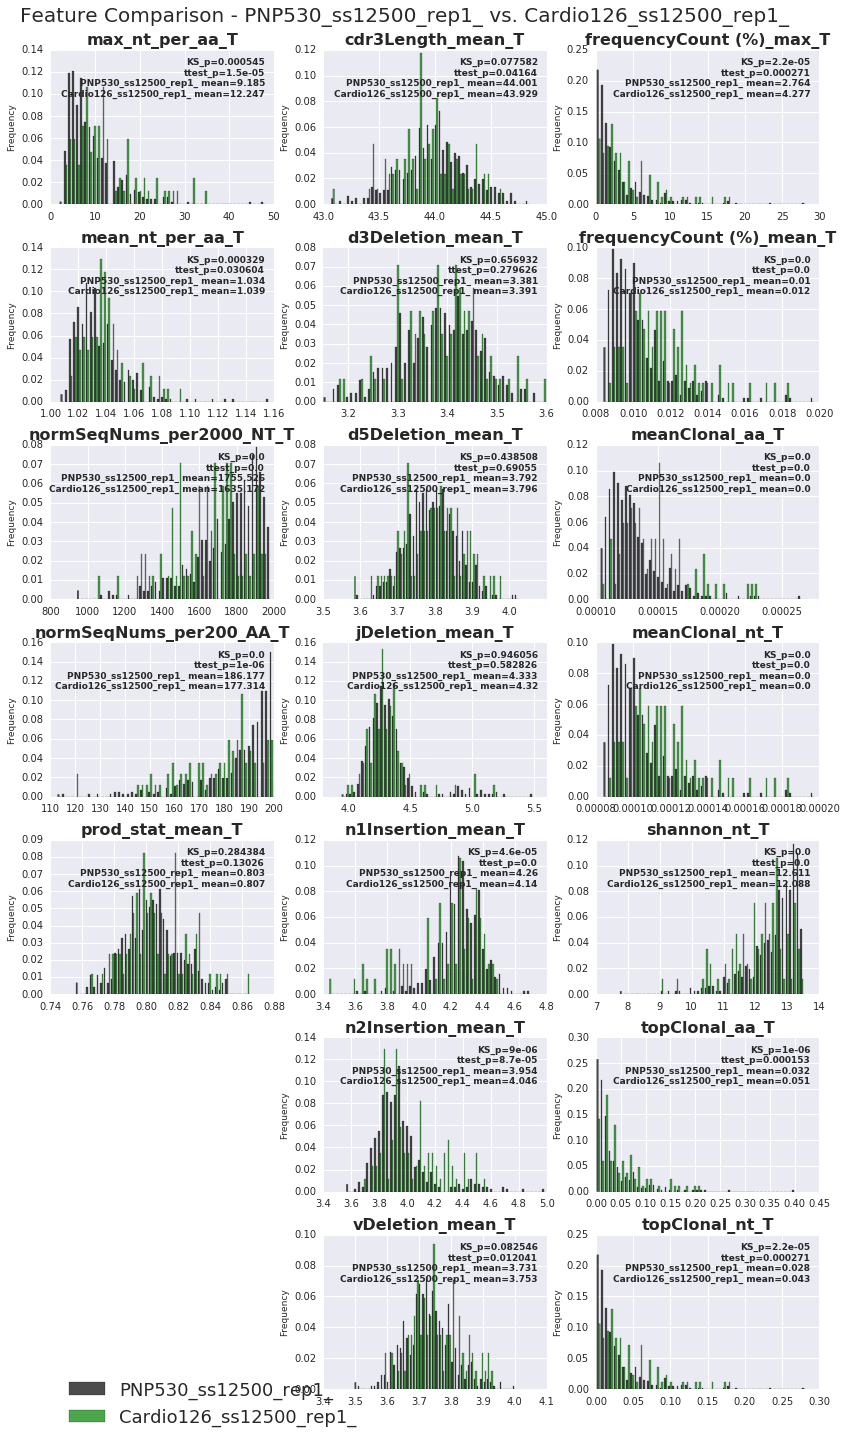

generating excel file with mean values for compared dataset (find in -featureSummaryDFs folder-)
plotting gene usage comparison...
plot file can be found in -realAnalysis folder


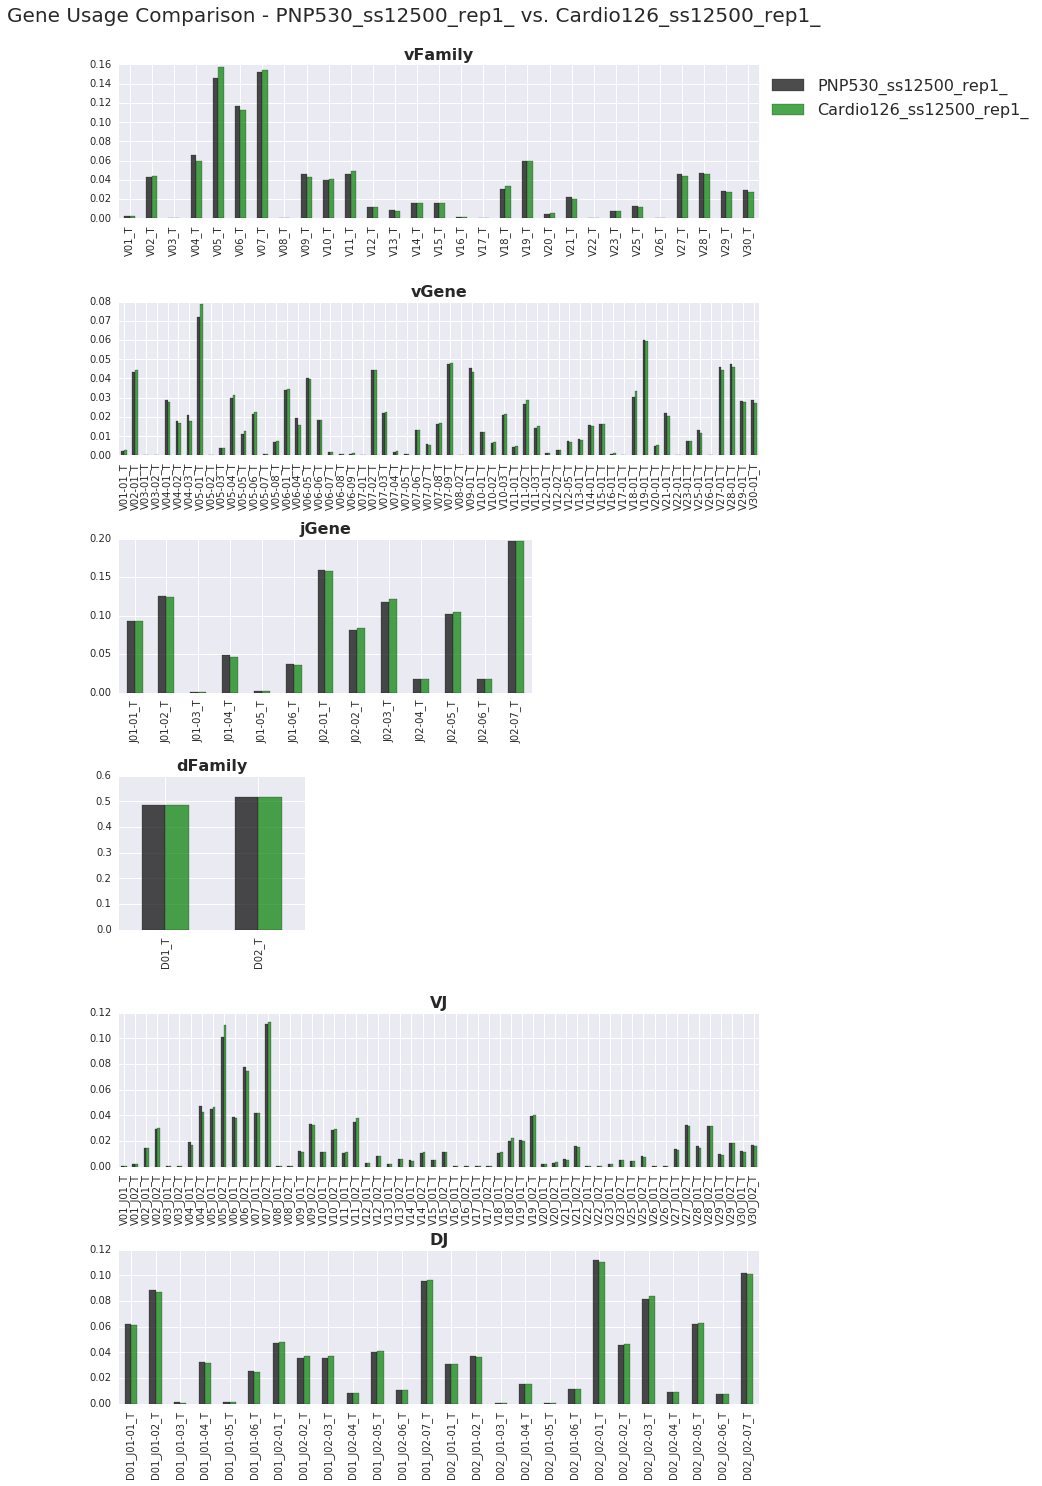

generating distmats for PNP
generating distMat for phenotype Age
generating condensed distance matrix using euclidean
top similar pairs:
        dist sample1 sample2
225746   0.0   BD350   BD383
352586   0.0   BD556   BD756
92984    0.0   BD192   BD727
134174   0.0   BD237   BD920
307720   0.0   BD473   BD659
92989    0.0   BD192   BD731
158914   0.0   BD266   BD766
92994    0.0   BD192   BD736
282224   0.0   BD431    BD71
201386   0.0   BD318   BD701
generating squareform distance matrix using euclidean
generating distMat for phenotype BMI
generating condensed distance matrix using euclidean
top similar pairs:
        dist sample1 sample2
271058   0.0   BD414   BD715
152555   0.0   BD259   BD561
93842    0.0   BD193    BD74
167487   0.0   BD277   BD310
446217   0.0   BD877   BD919
323674   0.0   BD500   BD593
209149   0.0   BD328   BD769
61091    0.0   BD159   BD761
152884   0.0   BD259   BD858
380319   0.0   BD617   BD838
generating squareform distance matrix using euclidean
generati

0.04
0.04
repeating permanova for phenotype Smoking Status_Past with 9999 permutations
load and process distMat and phenotype...
conducting permanova...
0.0607
0.0607
TCRdfminNshared2RAonlyProductiveTruepercShared10OLtrimmed_braycurtis_distMat
TCRdistMat head:
Sample       BD1      BD10     BD101     BD104     BD105
Sample                                                  
BD1     0.000000  0.887863  0.869280  0.871762  0.830220
BD10    0.887863  0.000000  0.885512  0.858418  0.852916
BD101   0.869280  0.885512  0.000000  0.893825  0.912409
BD104   0.871762  0.858418  0.893825  0.000000  0.918060
BD105   0.830220  0.852916  0.912409  0.918060  0.000000
phenotype head:
BD
BD1      1
BD10     1
BD100    0
BD101    0
BD102    0
Name: Smoking Status_Past, dtype: int64
conducting permanova
load and process distMat and phenotype...
conducting permanova...
0.02
0.02
repeating permanova for phenotype Smoking Status_Past with 9999 permutations
load and process distMat and phenotype...
conducting

IOError: [Errno 2] No such file or directory: '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/PNP530_SubSampled12500data_rep1/phenDistMats/PNP530ss12500_1_repAge_euclidean_distMat'

In [4]:
ss=12500
repeat=1
ssPNP=False #True/False. subsample only if not exist
ssCardio=False #True/False. subsample only if not exist
genTCRdfPNP=False #True/False. 
genTCRdfCardio=False #True/False.

testPhenotypeAffectsOnsubsampledCohorts(ss,repeat,ssPNP,ssCardio,genTCRdfPNP,genTCRdfCardio)

# analyze 'Known CAD' phenotype:

## compare phenotypes and TCR features between Dphenotype groups:

### define function:

the function compareGroups_DphenotypeBinary was copied to CardioFunctions.py

### run for 'Known CAD'

In [ ]:
Dphenotype='Known CAD'
ss=None
repeat=None
phenotypeDF=None
ssPNP=False
ssCardio=False
divideByDphenotype=True
compareFeature=True
comparePhenotypes=True

compareGroups_DphenotypeBinary(Dphenotype,ssCardio,divideByDphenotype,compareFeature=compareFeature,
                        comparePhenotypes=comparePhenotypes)



### run for 'Known CAD' and ss9000rep2

In [ ]:
Dphenotype='Known CAD'
ss=9000
repeat=2
phenotypeDF=None
ssPNP=False
ssCardio=False
divideByDphenotype=True
compareFeature=True
comparePhenotypes=True

compareGroups_DphenotypeBinary(Dphenotype,ssCardio,divideByDphenotype,compareFeature=compareFeature,
                        comparePhenotypes=comparePhenotypes,ss=ss,repeat=repeat)



## generate seperate TCRdfs for each Dphenotype group:

In [ ]:
the function genTCRdfForDphenotypeGroup was copied to CardioFunctions.py

### run for 'Known CAD'

In [ ]:
Dphenotype='Known CAD'
ssCardio=False
percShared=3

genTCRdfForDphenotypeGroup(Dphenotype,ssCardio,percShared)

### run for 'Known CAD' and ss9000rep2

In [ ]:
Dphenotype='Known CAD'
ssCardio=False
percShared=10
ss=9000
repeat=2

genTCRdfForDphenotypeGroup(Dphenotype,ssCardio,percShared,ss=ss,repeat=repeat)

## compare public sequences in Dphenotype:

In [ ]:
datasetName1='Cardio126'
datasetName2='Cardio126'
datasetFolder1='%s/TCR_real_data/CardioSamples' %MyPath
datasetFolder2='%s/TCR_real_data/CardioSamples' %MyPath
sampleListName1='Known CAD_0'
sampleListName2='Known CAD_1'
TCRdfPercShared1=5
TCRdfPercShared2=5
identityColumnForPie='Epitopespecies_VDJDB' #'Epitopespecies_VDJDB'/'Pathology_McPAS'
dropnaFromIdentitiesPie=True



datasetList=[(datasetName1, datasetFolder1,TCRdfPercShared1,sampleListName1),
             (datasetName2, datasetFolder2,TCRdfPercShared2,sampleListName2)]


comparePublicSeqIdentities(datasetList,identityColumnForPie)

## predictions:

### Generate TCRfeatureDF without completely correlated columns:

In [ ]:
filterFeaturesByCorr=1

ss=None
repeat=None
genFeatureDF=True
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
sampleList=Cardio126
sampleListName='Cardio126'
print len(sampleList)


TCRfeatureDF3=removeRedundantFeatures(ss,repeat,filterFeaturesByCorr,sampleList,sampleListName,genFeatureDF)
 

### get DFs:

In [ ]:
# ss=12500
# repeat=1
datasetFolder='%s/TCR_real_data/CardioSamples' %MyPath
datasetName='Cardio126' 
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
sampleList=Cardio126
sampleList=editSampleNamesList(sampleList)
sampleListName='Cardio126'
percShared=10
print datasetName


# phenotype df:
f3='%s/phenotypicData/Cardio126_phen_new_dummies_extended.xlsx' %datasetFolder
phenotypeDF=pd.read_excel(f3).set_index('BD')
print 'phenotypeDF shape is %s_%s' %(phenotypeDF.shape[0],phenotypeDF.shape[1])
print phenotypeDF.iloc[:4,:4]

#TCRdf:
print 'getting TCRdf...'

sharingFolder='%s/sharingAnalysis' %datasetFolder
TCRdfName='sharingMatrix_%s_minNshared2_RA_onlyProductiveTrue__percShared%s_OLtrimmed_binary' %(datasetName,percShared)
TCRdfFile='%s/%s' %(sharingFolder,TCRdfName )
print TCRdfFile
TCRdf=pd.read_pickle(TCRdfFile)
print 'TCRdf shape is %s_%s' %(TCRdf.shape[0],TCRdf.shape[1])
print TCRdf.iloc[:4,:4]

#Features
print 'getting TCRfeatureDF - without highly correlated columns...'
featureFilePickle2='%s/TCR_real_data/PNP530Cardio126Combined/featureSummaryDFs/PNP530Cardio126%s_allFeatures_noCorrelated' %(MyPath,
                                                                                        '_filteredBy'+sampleListName)
TCRfeatureDF2=pd.read_pickle(featureFilePickle2)
print 'TCRfeatureDF shape is %s_%s' %(TCRfeatureDF2.shape[0],TCRfeatureDF2.shape[1])
TCRfeatureDF2.iloc[:4,:4]


### run predictions:

In [ ]:
Dphenotype='Known CAD'

###consider changing: n_splits, TCRdf,n_comp
featureComposition_list=['phenotypesOnly','phenotypes&PCA&TCRfeatures','phenotypes&TCRdf&PCA&TCRfeatures']
for featureComposition in featureComposition_list:
    XName='%s_%s' %(datasetName,featureComposition)
    if featureComposition=='phenotypesOnly':
        useTCRfeatures=False #True/False
        usePCAdf=False #True/False
        useTCRdf=False #True/False
    elif featureComposition=='phenotypes&PCA&TCRfeatures':
        useTCRfeatures=True #True/False
        usePCAdf=True #True/False
        useTCRdf=False #True/False
    elif featureComposition=='phenotypes&TCRdf&PCA&TCRfeatures':
        useTCRfeatures=True #True/False
        usePCAdf=True #True/False
        useTCRdf=True #True/False

    if featureComposition=='phenotypesOnly':
        kList=[10]
    else:        
#         kList=[10,25,50,70,100,120,150,170,200,250,300]
        kList=[5,7]


    for k in kList:
        modelAndParams_list=[(LogisticRegression,'LogisticRegression',{'C':10,'penalty':'l1'}),
                       (lgb.LGBMClassifier,'LGBMClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
                 'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                    (lgb.LGBMClassifier,'LGBMClassifier',{'learning_rate': 0.1, 'n_estimators': 1000,'max_depth': 3,'num_threads':2,
                 'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                     (lgb.LGBMClassifier,'LGBMClassifier',{'learning_rate': 0.05, 'n_estimators': 1000,'max_depth': 6,'num_threads':2,
                 'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                       (XGBClassifier,'XGBClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
                 'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                            (XGBClassifier,'XGBClassifier',{'learning_rate': 0.05, 'n_estimators': 1000,'max_depth': 6,'num_threads':2,
                 'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3})]

        for n,modelAndParams in enumerate(modelAndParams_list):
                model=modelAndParams[0]
                modelName=modelAndParams[1]
                model_params=modelAndParams[2]
                
                if model==LogisticRegression:
                    featureSelectionMethod_list=[f_classif,'random']
                else:
                    featureSelectionMethod_list=[f_classif,'random','usingModel']
                if featureComposition=='phenotypesOnly':
                    featureSelectionMethod_list=[None]
                for featureSelectionMethod in featureSelectionMethod_list:

                    XName='%s_%s' %(datasetName,featureComposition)
                    
                    print '******featureComposition=%s, k=%s,modelAndParams=%s,featureSelectionMethod=%s********' %(featureComposition,
                                                            k,modelAndParams,featureSelectionMethod)

                    # (1) general definitions:
                    datasetType='Cardio' #PNP/PNP_Cardio

                    #(2) model definitions:
                    ResultFolder='%s/TCR_real_data/CardioSamples/Predictions2' %MyPath
                    if not isdir(ResultFolder):
                        makedirs(ResultFolder)

                    n_splits=10
                    useCV=True
                    stratifiedCV=True

                    # (5) phenotypeDF:

                    genPhenotypeDF=False #True/False. no sense for 'True'  if usePhenotype=False
                    phenotypeDF=phenotypeDF
                    phenotypeDFname='cardioFull' #('small','allNum and more- see step #6.2

                    #(3) target definition:

                    targetDF=pd.DataFrame(phenotypeDF[Dphenotype])
        #             targetName=Dphenotype
                    targetDF=targetDF[targetDF[Dphenotype].notnull()]
                    YName=Dphenotype
                    print 'target value counts:'
                    print targetDF[Dphenotype].value_counts(dropna=False)

                    #  (4) feature composition:

                    ## naming instructions: phenotypes: indicate old or new, TCRdf-indicate threshold to inclusion and binary/RA, 
                    ## PCA- indicate n_comp and is Sparse, indicate feature selection
                    usePhenotype=True #True/False

                    # (6) TCRdf:
                    datasetFolder='%s/TCR_real_data/CardioSamples' %MyPath
                    datasetNameTCRdf='Cardio126'  
                    TCRdfName='sharingMatrix_Cardio126_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed_binary'
                    TCRdf=TCRdf

                    #(7) PCAdf (based on the TCRdf selected)
                    n_comp=100 # int or None 
                    isSparse=True #True/False

                    #(8) TCRfeatures:
                    getTCRfeatures=False #True/False. do not use True when useTCRfeatures=False
                    TCRfeatureDF=TCRfeatureDF2

                    sampleList=sampleList
                    sampleListName='Cardio126'

                    filterFeaturesByCorr=None #None or float between 0 and 1
                    featureSelectionUsingModel=False # True/False
            #                     C=0.5 #None (if none, C will be set to 0.1) or float between 0 and 1
            #                     filterFeaturesByUnivariate=f_classif    # None/chi2/f_classif/mutual_info_classif
            #             k=150 #None (will be set to 50 / int - defines number of k best))
                    scale=True

                    predictionPipeline(datasetType,ResultFolder,model,modelName,model_params,n_splits, useCV,
                                          stratifiedCV, XName,usePhenotype,useTCRdf,useTCRfeatures,usePCAdf,
                                          YName,targetDF,
                                          genPhenotypeDF,phenotypeDF,phenotypeDFname,
                                          datasetFolder,datasetNameTCRdf,TCRdf,TCRdfName,n_comp,isSparse,
                                          getTCRfeatures,TCRfeatureDF,sampleListName,sampleList,
                                          filterFeaturesByCorr,featureSelectionMethod,scale,
                                          k,cdate=cdate,overwriteResults=True)

print 'done with all iterations...'

### explore prediction results:

#### get results:

In [ ]:
modelNameList=['LogisticRegression','LGBMClassifier','XGBClassifier']
YName='Known CAD'
for modelName in modelNameList:
    print modelName
    folder='%s/TCR_real_data/CardioSamples/Predictions2/%s_predictions/%s' %(MyPath,YName,modelName)
    df_folder='%s/predictionDFs' %folder
    results=concat_summarizing_dfs_excel(df_folder)
    results=results.sort_values(by='roc_auc', ascending=False)
    f1='%s/resultSummary_%s.xlsx' %(folder,cdate)
    results.to_excel(f1)
    results.head(20)

#### plot results:

In [ ]:
plt.show()

In [ ]:
YName='Known CAD'
datasetName='Cardio126'

ss=None
repeat=None

# figure for each feature selection method, for ROC/PR:

featureSelectionMethod_list=['random','usingModel',' f_classif'] 
filterColumn='featureSelectionMethod' 

resultFolder='%s/TCR_real_data/CardioSamples/Predictions2' %MyPath

colorList=['blue','deepskyblue','darkgreen','lime','red','coral']
colList=[('roc_auc',(0.5,1)),('pr_auc_corrected',(0.2,0.6))]
withTCRdf='both'
title=''
count=1
# filedate='14082018'

for featureSelectionMethod in featureSelectionMethod_list:
    for dataColumnInfo in colList:
    
        dataColumn=dataColumnInfo[0]
        ylim=dataColumnInfo[1]
        fig,ax1=plt.subplots(figsize=(16,9))
    #     
        print count
        count=count+1
        ss=None
        repeat=None
#         title='%s_%s_%s' %(YName,datasetName,featureSelectionMethod)
        title=''
        filterCrit=featureSelectionMethod
        ax=plot_prediction_results(ss,repeat,colorList,dataColumn,ax1,withTCRdf=withTCRdf,title=title,
                                   xlim=(0,300),ylim=ylim,filedate=cdate,resultFolder=resultFolder,
                                  filterColumn=filterColumn,filterCrit=filterCrit,datasetName=datasetName,YName=YName)

        ax1.legend(fontsize=14,bbox_to_anchor=(-0.05, 1))

        fig.suptitle('Feature Selection Method=%s' % featureSelectionMethod)
        fig.subplots_adjust(left=0.35)
        figName='predPerformance_compareDatasetFeaturenumFeaturetype_%s_withTCRdf%s_%s%s_%s' %(dataColumn,withTCRdf,
                                                                        filterColumn,filterCrit,cdate)
        folder='%s/%s_predictions' %(resultFolder,YName)
        figFile='%s/%s' %(folder,figName)
        fig.savefig(figFile,dpi=300)
        plt.show()
            
print 'done'


    
    

# analyze 'PreviousPCI_binary ' phenotype:

## compare phenotypes and TCR features between Dphenotype groups:

### run for 'PreviousPCI_binary'

In [ ]:
PreviousPCI_binary

In [ ]:
Dphenotype='PreviousPCI_binary'
ss=None
repeat=None
phenotypeDF=None
ssPNP=False
ssCardio=False
divideByDphenotype=True
compareFeature=True
comparePhenotypes=True

compareGroups_DphenotypeBinary(Dphenotype,ssCardio,divideByDphenotype,compareFeature=compareFeature,
                        comparePhenotypes=comparePhenotypes)



### run for 'PreviousPCI_binary' and ss9000rep2

In [ ]:
Dphenotype='PreviousPCI_binary'
ss=9000
repeat=2
phenotypeDF=None
ssPNP=False
ssCardio=False
divideByDphenotype=True
compareFeature=True
comparePhenotypes=True

compareGroups_DphenotypeBinary(Dphenotype,ssCardio,divideByDphenotype,compareFeature=compareFeature,
                        comparePhenotypes=comparePhenotypes,ss=ss,repeat=repeat)



## generate seperate TCRdfs for each Dphenotype group:

In [ ]:
the function genTCRdfForDphenotypeGroup was copied to CardioFunctions.py

### run for 'PreviousPCI_binary'

In [ ]:
Dphenotype='PreviousPCI_binary'
ssCardio=False
percShared=5

genTCRdfForDphenotypeGroup(Dphenotype,ssCardio,percShared)

### run for 'PreviousPCI_binary' and ss9000rep2

In [ ]:
Dphenotype='PreviousPCI_binary'
ssCardio=False
percShared=5
ss=9000
repeat=2

genTCRdfForDphenotypeGroup(Dphenotype,ssCardio,percShared,ss=ss,repeat=repeat)

## compare public sequences in Dphenotype:

In [ ]:
datasetName1='Cardio126'
datasetName2='Cardio126'
datasetFolder1='%s/TCR_real_data/CardioSamples' %MyPath
datasetFolder2='%s/TCR_real_data/CardioSamples' %MyPath
sampleListName1='PreviousPCI_binary_0'
sampleListName2='PreviousPCI_binary_1'
TCRdfPercShared1=5
TCRdfPercShared2=5
identityColumnForPie='Pathology_McPAS' #'Epitopespecies_VDJDB'/'Pathology_McPAS'
dropnaFromIdentitiesPie=True



datasetList=[(datasetName1, datasetFolder1,TCRdfPercShared1,sampleListName1),
             (datasetName2, datasetFolder2,TCRdfPercShared2,sampleListName2)]


comparePublicSeqIdentities(datasetList,identityColumnForPie)

In [ ]:
datasetName1='Cardio126'
datasetName2='Cardio126'
datasetFolder1='%s/TCR_real_data/CardioSamples' %MyPath
datasetFolder2='%s/TCR_real_data/CardioSamples' %MyPath
sampleListName1='PreviousPCI_binary_0'
sampleListName2='PreviousPCI_binary_1'
TCRdfPercShared1=None
TCRdfPercShared2=None
identityColumnForPie='Pathology_McPAS' #'Epitopespecies_VDJDB'/'Pathology_McPAS'
dropnaFromIdentitiesPie=True



datasetList=[(datasetName1, datasetFolder1,TCRdfPercShared1,sampleListName1),
             (datasetName2, datasetFolder2,TCRdfPercShared2,sampleListName2)]


comparePublicSeqIdentities(datasetList,identityColumnForPie)

## predictions:

### Generate TCRfeatureDF without completely correlated columns:

already done for Cardio126
 

### get DFs:

In [ ]:
datasetFolder='%s/TCR_real_data/CardioSamples' %MyPath
datasetName='Cardio126' 
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
sampleList=Cardio126
sampleList=editSampleNamesList(sampleList)
sampleListName='Cardio126'
percShared=10
print datasetName


# phenotype df:
f3='%s/phenotypicData/Cardio126_phen_new_dummies_extended.xlsx' %datasetFolder
phenotypeDF=pd.read_excel(f3).set_index('BD')
print 'phenotypeDF shape is %s_%s' %(phenotypeDF.shape[0],phenotypeDF.shape[1])
print phenotypeDF.iloc[:4,:4]

#TCRdf:
print 'getting TCRdf...'

sharingFolder='%s/sharingAnalysis' %datasetFolder
TCRdfName='sharingMatrix_%s_minNshared2_RA_onlyProductiveTrue__percShared%s_OLtrimmed_binary' %(datasetName,percShared)
TCRdfFile='%s/%s' %(sharingFolder,TCRdfName )
print TCRdfFile
TCRdf=pd.read_pickle(TCRdfFile)
print 'TCRdf shape is %s_%s' %(TCRdf.shape[0],TCRdf.shape[1])
print TCRdf.iloc[:4,:4]

#Features
print 'getting TCRfeatureDF - without highly correlated columns...'
featureFilePickle2='%s/TCR_real_data/PNP530Cardio126Combined/featureSummaryDFs/PNP530Cardio126%s_allFeatures_noCorrelated' %(MyPath,
                                                                                        '_filteredBy'+sampleListName)
TCRfeatureDF2=pd.read_pickle(featureFilePickle2)
print 'TCRfeatureDF shape is %s_%s' %(TCRfeatureDF2.shape[0],TCRfeatureDF2.shape[1])
TCRfeatureDF2.iloc[:4,:4]


### run predictions:

In [ ]:
Dphenotype='PreviousPCI_binary'

###consider changing: n_splits, TCRdf,n_comp
featureComposition_list=['phenotypesOnly','phenotypes&PCA&TCRfeatures','phenotypes&TCRdf&PCA&TCRfeatures']
for featureComposition in featureComposition_list:
    XName='%s_%s' %(datasetName,featureComposition)
    if featureComposition=='phenotypesOnly':
        useTCRfeatures=False #True/False
        usePCAdf=False #True/False
        useTCRdf=False #True/False
    elif featureComposition=='phenotypes&PCA&TCRfeatures':
        useTCRfeatures=True #True/False
        usePCAdf=True #True/False
        useTCRdf=False #True/False
    elif featureComposition=='phenotypes&TCRdf&PCA&TCRfeatures':
        useTCRfeatures=True #True/False
        usePCAdf=True #True/False
        useTCRdf=True #True/False

    if featureComposition=='phenotypesOnly':
        kList=[10]
    else:        
        kList=[350,400,500]
#         kList=[5,7,10,25,50,70,100,120,150,200,300]


    for k in kList:
        modelAndParams_list=[(LogisticRegression,'LogisticRegression',{'C':10,'penalty':'l1'}),
                      (lgb.LGBMClassifier,'LGBMClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
                 'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                       (XGBClassifier,'XGBClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
                 'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3})]

        for n,modelAndParams in enumerate(modelAndParams_list):
                model=modelAndParams[0]
                modelName=modelAndParams[1]
                model_params=modelAndParams[2]
                
                if model==LogisticRegression:
                    featureSelectionMethod_list=[f_classif,'random']
                else:
                    featureSelectionMethod_list=[f_classif,'random','usingModel']
                if featureComposition=='phenotypesOnly':
                    featureSelectionMethod_list=[None]
                for featureSelectionMethod in featureSelectionMethod_list:

                    XName='%s_%s' %(datasetName,featureComposition)
                    
                    print '******featureComposition=%s, k=%s,modelAndParams=%s,featureSelectionMethod=%s********' %(featureComposition,
                                                            k,modelAndParams,featureSelectionMethod)

                    # (1) general definitions:
                    datasetType='Cardio' #PNP/PNP_Cardio

                    #(2) model definitions:
                    ResultFolder='%s/TCR_real_data/CardioSamples/Predictions2' %MyPath
                    if not isdir(ResultFolder):
                        makedirs(ResultFolder)

                    n_splits=10
                    useCV=True
                    stratifiedCV=True

                    # (5) phenotypeDF:

                    genPhenotypeDF=False #True/False. no sense for 'True'  if usePhenotype=False
                    phenotypeDF=phenotypeDF
                    phenotypeDFname='cardioFull' #('small','allNum and more- see step #6.2

                    #(3) target definition:

                    targetDF=pd.DataFrame(phenotypeDF[Dphenotype])
        #             targetName=Dphenotype
                    targetDF=targetDF[targetDF[Dphenotype].notnull()]
                    YName=Dphenotype
                    print 'target value counts:'
                    print targetDF[Dphenotype].value_counts(dropna=False)

                    #  (4) feature composition:

                    ## naming instructions: phenotypes: indicate old or new, TCRdf-indicate threshold to inclusion and binary/RA, 
                    ## PCA- indicate n_comp and is Sparse, indicate feature selection
                    usePhenotype=True #True/False

                    # (6) TCRdf:
                    datasetFolder='%s/TCR_real_data/CardioSamples' %MyPath
                    datasetNameTCRdf='Cardio126'  
                    TCRdfName='sharingMatrix_Cardio126_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed_binary'
                    TCRdf=TCRdf

                    #(7) PCAdf (based on the TCRdf selected)
                    n_comp=100 # int or None 
                    isSparse=True #True/False

                    #(8) TCRfeatures:
                    getTCRfeatures=False #True/False. do not use True when useTCRfeatures=False
                    TCRfeatureDF=TCRfeatureDF2

                    sampleList=sampleList
                    sampleListName='Cardio126'

                    filterFeaturesByCorr=None #None or float between 0 and 1
                    featureSelectionUsingModel=False # True/False
            #                     C=0.5 #None (if none, C will be set to 0.1) or float between 0 and 1
            #                     filterFeaturesByUnivariate=f_classif    # None/chi2/f_classif/mutual_info_classif
            #             k=150 #None (will be set to 50 / int - defines number of k best))
                    scale=True

                    predictionPipeline(datasetType,ResultFolder,model,modelName,model_params,n_splits, useCV,
                                          stratifiedCV, XName,usePhenotype,useTCRdf,useTCRfeatures,usePCAdf,
                                          YName,targetDF,
                                          genPhenotypeDF,phenotypeDF,phenotypeDFname,
                                          datasetFolder,datasetNameTCRdf,TCRdf,TCRdfName,n_comp,isSparse,
                                          getTCRfeatures,TCRfeatureDF,sampleListName,sampleList,
                                          filterFeaturesByCorr,featureSelectionMethod,scale,
                                          k,cdate=cdate,overwriteResults=True)

print 'done with all iterations...'

### explore prediction results:

#### get results:

In [ ]:
modelNameList=['LogisticRegression','LGBMClassifier','XGBClassifier']
YName='PreviousPCI_binary'

for modelName in modelNameList:
    print modelName
    folder='%s/TCR_real_data/CardioSamples/Predictions2/%s_predictions/%s' %(MyPath,YName,modelName)
    df_folder='%s/predictionDFs' %folder
    results=concat_summarizing_dfs_excel(df_folder)
    results=results.sort_values(by='roc_auc', ascending=False)
    f1='%s/resultSummary_%s.xlsx' %(folder,cdate)
    results.to_excel(f1)
    results.head(20)

#### plot results:

In [ ]:
YName='PreviousPCI_binary'
datasetName='Cardio126'

ss=None
repeat=None

# figure for each feature selection method, for ROC/PR:

featureSelectionMethod_list=['random','usingModel',' f_classif'] 
filterColumn='featureSelectionMethod' 

resultFolder='%s/TCR_real_data/CardioSamples/Predictions2' %MyPath

colorList=['blue','deepskyblue','darkgreen','lime','red','coral']
colList=[('roc_auc',(0.7,1)),('pr_auc_corrected',(0.4,0.6))]
withTCRdf='both'
title=''
count=1
# filedate='14082018'

for featureSelectionMethod in featureSelectionMethod_list:
    for dataColumnInfo in colList:
    
        dataColumn=dataColumnInfo[0]
        ylim=dataColumnInfo[1]
        fig,ax1=plt.subplots(figsize=(16,9))
    #     
        print count
        count=count+1
        ss=None
        repeat=None
        title='%s_%s_%s' %(YName,datasetName,featureSelectionMethod)
        filterCrit=featureSelectionMethod
        xlim=(0,500)
        ax=plot_prediction_results(ss,repeat,colorList,dataColumn,ax1,withTCRdf=withTCRdf,title=title,
                                   xlim=xlim,ylim=ylim,filedate=cdate,resultFolder=resultFolder,
                                  filterColumn=filterColumn,filterCrit=filterCrit,datasetName=datasetName,YName=YName)

#         ss,repeat,colorList,dataColumn,ax,resultFolder=None,withTCRdf=True,title='',ylim=(0,1),xlim=(0,300),
#                             filedate='14082018',YName='isCardio',datasetName=None):
 
        ax1.legend(fontsize=14,bbox_to_anchor=(-0.05, 1))

        fig.suptitle('Feature Selection Method=%s' % featureSelectionMethod)
        fig.subplots_adjust(left=0.35)
        figName='predPerformance_compareDatasetFeaturenumFeaturetype_%s_withTCRdf%s_%s%s_%s' %(dataColumn,withTCRdf,
                                                                        filterColumn,filterCrit,cdate)
        folder='%s/%s_predictions' %(resultFolder, YName)
        figFile='%s/%s' %(folder,figName)
        fig.savefig(figFile,dpi=300)
        plt.show()
            
print 'done'


    
    

# analyze 'Previous CABG ' phenotype:

## compare phenotypes and TCR features between Dphenotype groups:

### run for 'Previous CABG'

In [ ]:
Dphenotype='Previous CABG'
ss=None
repeat=None
phenotypeDF=None
ssPNP=False
ssCardio=False
divideByDphenotype=True
compareFeature=True
comparePhenotypes=True

compareGroups_DphenotypeBinary(Dphenotype,ssCardio,divideByDphenotype,compareFeature=compareFeature,
                        comparePhenotypes=comparePhenotypes)



In [ ]:
# modelNameList=['LGBMClassifier','XGBClassifier']
modelNameList=['LogisticRegression','LGBMClassifier','XGBClassifier']
for modelName in modelNameList:
    print modelName
    folder='%s/TCR_real_data/newPredictions4/isCardio_predictions/%s/predictionDFs' %(MyPath,modelName)
    results=concat_summarizing_dfs_excel(folder)
    results=results.sort_values(by='roc_auc', ascending=False)
    f1='%s/TCR_real_data/newPredictions4/isCardio_predictions/%s/resultSummary_%s.xlsx' %(MyPath, modelName,cdate)
    results.to_excel(f1)
    results.head(20)

In [ ]:
# figure for each feature selection method, for ROC/PR:

featureSelectionMethod_list=['random','usingModel',' f_classif'] 
filterColumn='featureSelectionMethod' 

resultFolder='%s/TCR_real_data/newPredictions4' %MyPath

colorList=['blue','deepskyblue','darkgreen','lime','red','coral']
colList=[('roc_auc',(0.5,1)),('pr_auc_corrected',(0,0.5))]
withTCRdf='both'
title=''
count=1
# filedate='14082018'

for featureSelectionMethod in featureSelectionMethod_list:
    for dataColumnInfo in colList:
    
        dataColumn=dataColumnInfo[0]
        ylim=dataColumnInfo[1]
        fig,axes=plt.subplots(nrows=1, ncols=5,figsize=(22,7),sharex=True)
        datasetList=[(5000,2),(9000,2)]
#          datasetList=[(5000,2),(9000,2),(12500,1),(12500,2),(15000,2)]
    #     
        print count
        count=count+1
        filterCrit=featureSelectionMethod
        for n,dataset in enumerate(datasetList):
            ax1=axes[n]
            ss=dataset[0]
            repeat=dataset[1]
            title='ss%s_rep%s' %(ss,repeat)
            ax=plot_prediction_results(ss,repeat,colorList,dataColumn,ax1,withTCRdf=withTCRdf,title=title,
                                       xlim=(0,300),ylim=ylim,filedate=cdate,resultFolder=resultFolder,
                                      filterColumn=filterColumn,filterCrit=filterCrit)

    #         ss,repeat,colorList,dataColumn,ax,resultFolder=None,withTCRdf=True,title='',ylim=(0,1),xlim=(0,300),
    #                             filedate='14082018',YName='isCardio',datasetName=None):

            if n==0:    
                ax1.legend(fontsize=14,bbox_to_anchor=(-0.1, 1))
            else:
                ax1.legend('')
        fig.suptitle('Feature Selection Method=%s' % featureSelectionMethod)
        fig.subplots_adjust(left=0.2)
        figName='predPerformance_compareDatasetFeaturenumFeaturetype_%s_withTCRdf%s_%s%s_%s' %(dataColumn,withTCRdf,
                                                                        filterColumn,filterCrit,cdate)
        folder='%s/isCardio_predictions' %resultFolder
        figFile='%s/%s' %(folder,figName)
        fig.savefig(figFile,dpi=300)
        plt.show()
            
print 'done'